<a href="https://colab.research.google.com/github/sivaramanrajagopal/myNLP60dayprogress/blob/main/Day19_27022022_NLP_Text_Sentiment_analysis_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
upload=files.upload()

Saving moviereviews.tsv to moviereviews.tsv


In [22]:
df= pd.read_csv("moviereviews.tsv",sep ='\t')

In [23]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [24]:
len(df)


2000

In [6]:
from io import StringIO
col = ['label', 'review']
df = df[col]
df = df[pd.notnull(df['review'])]
df.columns = ['label', 'review']
df['category_id'] = df['label'].factorize()[0]
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)
df.head()

,label,review,category_id
0,neg,how do films like mouse hunt get into theatres...,0
1,neg,some talented actresses are blessed with a dem...,0
2,pos,this has been an extraordinary year for austra...,1
3,pos,according to hollywood movies made in last few...,1
4,neg,my first press screening of 1998 and already i...,0


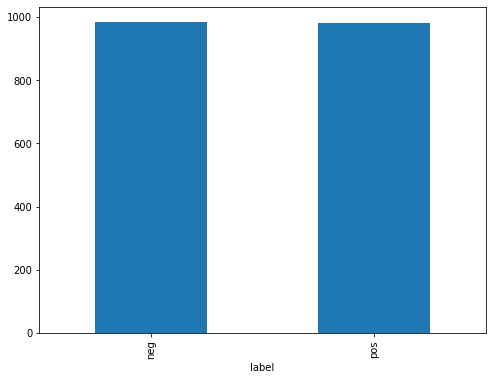

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').review.count().plot.bar(ylim=0)
plt.show()

In [25]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [26]:
df.dropna(inplace=True)

In [27]:
blanks = []
for i,lb,rv in df.itertuples():
  if type(rv)== 'str':
    if rv.isspace():
       blanks.append(i)



In [28]:
blanks

[]

In [29]:
df['label'].value_counts()

neg    983
pos    982
Name: label, dtype: int64

In [33]:
  import nltk
  nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [34]:
sid= SentimentIntensityAnalyzer()

In [35]:
df['scores'] = df['review'].apply(lambda review:sid.polarity_scores(review))

In [37]:
df

,label,review,scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co..."
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com..."
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com..."
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co..."
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com..."
...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...","{'neg': 0.073, 'neu': 0.764, 'pos': 0.163, 'co..."
1996,pos,it might surprise some to know that joel and e...,"{'neg': 0.237, 'neu': 0.689, 'pos': 0.074, 'co..."
1997,pos,the verdict : spine-chilling drama from horror...,"{'neg': 0.15, 'neu': 0.705, 'pos': 0.145, 'com..."
1998,pos,i want to correct what i wrote in a former ret...,"{'neg': 0.129, 'neu': 0.711, 'pos': 0.16, 'com..."


In [38]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [39]:
df

,label,review,scores,compound
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com...",0.9953
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com...",-0.7264
...,...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...","{'neg': 0.073, 'neu': 0.764, 'pos': 0.163, 'co...",0.9991
1996,pos,it might surprise some to know that joel and e...,"{'neg': 0.237, 'neu': 0.689, 'pos': 0.074, 'co...",-0.9993
1997,pos,the verdict : spine-chilling drama from horror...,"{'neg': 0.15, 'neu': 0.705, 'pos': 0.145, 'com...",-0.7564
1998,pos,i want to correct what i wrote in a former ret...,"{'neg': 0.129, 'neu': 0.711, 'pos': 0.16, 'com...",0.9489


In [40]:
df['comp_score'] = df['compound'].apply(lambda score:'pos'if score >= 0 else 'neg' )

In [41]:
df

,label,review,scores,compound,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com...",0.9953,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com...",-0.7264,neg
...,...,...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...","{'neg': 0.073, 'neu': 0.764, 'pos': 0.163, 'co...",0.9991,pos
1996,pos,it might surprise some to know that joel and e...,"{'neg': 0.237, 'neu': 0.689, 'pos': 0.074, 'co...",-0.9993,neg
1997,pos,the verdict : spine-chilling drama from horror...,"{'neg': 0.15, 'neu': 0.705, 'pos': 0.145, 'com...",-0.7564,neg
1998,pos,i want to correct what i wrote in a former ret...,"{'neg': 0.129, 'neu': 0.711, 'pos': 0.16, 'com...",0.9489,pos


In [46]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [47]:
accuracy_score(df['label'],df['comp_score'])

0.6346055979643765

In [48]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.72      0.43      0.54       983
         pos       0.60      0.84      0.70       982

    accuracy                           0.63      1965
   macro avg       0.66      0.63      0.62      1965
weighted avg       0.66      0.63      0.62      1965



In [50]:
print(confusion_matrix(df['label'],df['comp_score']))

[[427 556]
 [162 820]]
